## Backtesting Framework

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("Data/TrainingData.csv")

In [5]:
df = df.drop(columns=["Unnamed: 0", 'Unnamed: 0.1']).rename(columns={'instrumnet': 'instrument'})

In [6]:
df.head()

,date,open,high,low,close,volume,instrument
0,2012-01-02,87.95,93.80,87.10,89.15,124736,A2ZINFRA
1,2012-01-03,89.55,91.15,89.10,89.70,275034,A2ZINFRA
2,2012-01-04,90.45,90.50,87.50,88.35,241157,A2ZINFRA
3,2012-01-05,89.10,93.45,86.55,87.60,226102,A2ZINFRA
4,2012-01-06,87.00,89.45,86.30,87.70,97276,A2ZINFRA


In [7]:
stock_instruments = df['instrument'].unique()

In [8]:
len(stock_instruments)

1412

In [ ]:
def get_trade_type():
    #logic to weather buy, sell or hold
    pass
def register_trade():
    pass


In [9]:
# %% [markdown]
# # Backtest Your Strategy

# %%
import pandas as pd
import random
from datetime import datetime
from TradeReplay.decision  import DecisionStrategy
from TradeReplay.session   import Session

# %% define a simple momentum strategy
class MomentumStrategy(DecisionStrategy):
    def __init__(self, lookback=3):
        self.lookback = lookback
        self.history  = {}

    def decide(self, session, daily_df):
        """
        daily_df: pd.DataFrame with columns [date, open, high, low, close, volume, instrument]
        session: gives you session.portfolio and session.tradebook
        """
        for sym, group in daily_df.groupby("instrumnet"):
            closes = group["close"].tolist()
            # store history
            self.history.setdefault(sym, []).extend(closes)
            # only act if we have lookback+1 days
            prices = self.history[sym]
            if len(prices) >= self.lookback + 1:
                # simple momentum: if today’s close > close N days ago → BUY, else SELL
                if prices[-1] > prices[-1-self.lookback]:
                    session.portfolio.buy(sym, prices[-1], group["date"].iloc[0], quantity=random.randrange(1,10))
                elif sym in session.portfolio.holdings:
                    session.portfolio.sell(sym, prices[-1], group["date"].iloc[0], quantity=1)

# %% parameters
DATA_PATH  = "Data/TrainingData.csv"
START_DATE = datetime(2012,1,2)
END_DATE   = datetime(2012,6,30)

# %% run backtest
sess = Session(
    data_path = DATA_PATH,
    start_date=START_DATE,
    end_date  = END_DATE,
    brokerage = 0.0005,
    investment=100000
)
strategy = MomentumStrategy(lookback=5)
sess.run(strategy)

# %% inspect results
trades_df = pd.read_csv(sess.tradebook.filepath)
display(trades_df.head(), trades_df.tail())
# print("Final portfolio value:",
#       sess.portfolio.total_value(
#           # use last known prices for mark-to-market
#           { row.instrument: row.close
#             for _, row in sess.loader.df[sess.loader.df.date == END_DATE].iterrows() }
#       )
# )
holdings = sess.portfolio.holdings
print(holdings)

,symbol,action,date,price,quantity,net_amount
0,FEDERALBNK,BUY,2012-01-07 00:00:00,180.65,8,1461.85260
1,HINDZINC,BUY,2012-01-07 00:00:00,123.15,6,755.19945
2,RELIANCE,BUY,2012-01-07 00:00:00,357.38,1,373.48869
3,TECHM,BUY,2012-01-07 00:00:00,149.88,5,765.70470
4,A2ZINFRA,BUY,2012-01-09 00:00:00,89.50,7,642.74325


,symbol,action,date,price,quantity,net_amount
569,NITINSPIN,BUY,2012-02-24 00:00:00,7.40,2,30.737400
570,BIRLACABLE,SELL,2012-02-27 00:00:00,10.65,1,-5.285325
571,BLISSGVS,SELL,2012-02-27 00:00:00,23.35,1,7.408325
572,NITINSPIN,SELL,2012-02-27 00:00:00,6.95,1,-8.983475
573,FSL,SELL,2012-03-01 00:00:00,12.25,1,-3.686125


{}


In [5]:
holdings = sess.portfolio.holdings

In [6]:
holdings

{}

In [8]:
sess.portfolio.cash

3.702964999992931

Index(['symbol', 'action', 'date', 'price', 'quantity', 'net_amount',
       'cash_after', 'invested_after'],
      dtype='object')

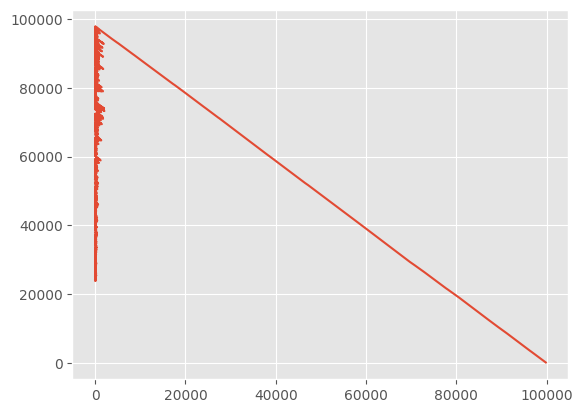

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv("tradebook.csv")
plt.plot(df['cash_after'], df['invested_after'])
df.head()
df.columns

,symbol,action,date,price,quantity,net_amount,cash_after,invested_after
0,FEDERALBNK,BUY,2012-01-07 00:00:00,180.65,1,196.670325,99803.329675,180.65
1,HINDZINC,BUY,2012-01-07 00:00:00,123.15,8,1001.622600,98801.707075,1165.85
2,RELIANCE,BUY,2012-01-07 00:00:00,357.38,1,373.488690,98428.218385,1523.23
3,TECHM,BUY,2012-01-07 00:00:00,149.88,7,1065.614580,97362.603805,2572.39
4,A2ZINFRA,BUY,2012-01-09 00:00:00,89.50,8,732.288000,96630.315805,3288.39


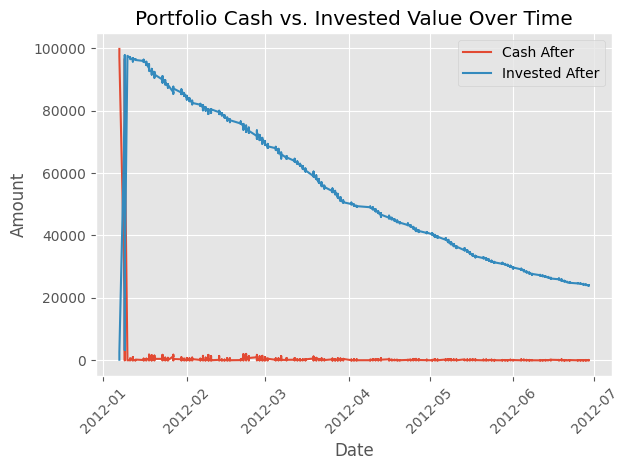

In [13]:
import matplotlib.pyplot as plt

# 1. Ensure your date column is datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# 2. Plot cash and invested over time
plt.figure()
plt.plot(df['date'], df['cash_after'], label='Cash After')
plt.plot(df['date'], df['invested_after'], label='Invested After')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.title('Portfolio Cash vs. Invested Value Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
import pandas_ta as ta

ModuleNotFoundError: No module named 'pandas_ta'

In [2]:
import pandas as pd
import pandas_ta as ta

# load your data
df = pd.read_csv("Data/TrainingData.csv", parse_dates=["date"])
df = df.sort_values(["instrument","date"])

# Compute EMA-5 and EMA-20 for each symbol
# pandas-ta’s groupby support lets you do it in one go:
df[["ema5","ema20"]] = (
    df
    .groupby("instrument")                  # for each stock
    .apply(lambda d: pd.DataFrame({
        "ema5":  d["close"].ta.ema(length=5),
        "ema20": d["close"].ta.ema(length=20)
    }))
    .reset_index(level=0, drop=True)        # align back to original index
)

# peek
df.head(10)

ModuleNotFoundError: No module named 'pandas_ta'

In [11]:
len(df[df['date'] == "2012-01-03"]['instrument'].unique())


908